In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns

In [17]:
df1 = pd.read_csv('data/winequality-red.csv', sep=';')
df2 = pd.read_csv('data/winequality-white.csv', sep=';')
# Drop the null columns where all values are null
df1 = df1.dropna(axis='columns', how='all')
df2 = df2.dropna(axis='columns', how='all')
# Drop the null rows
df1 = df1.dropna()
df2 = df2.dropna()
# Merge two dataframes
#df = df1.merge(df2, how='outer')

# pick white/red
df = df2 # pick white
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [18]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [19]:
#Now lets assign a labels to our quality variable
label_quality = LabelEncoder()

In [20]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [21]:
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

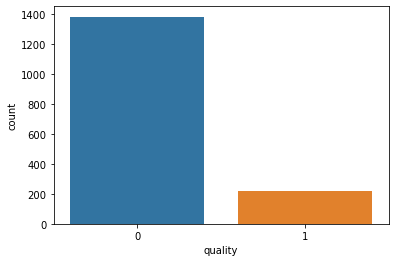

In [22]:
sns.countplot(df['quality'])

In [23]:
#  Create a Train Test Split
from sklearn.model_selection import train_test_split
y = df["quality"]
# X = df.drop(columns=["quality", "total sulfur dioxide", "fixed acidity", "volatile acidity", "citric acid"])
X = df[["density", "alcohol"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [24]:
X_train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
473             9.9              0.35         0.55             2.1      0.062   
1483            8.1              0.33         0.44             1.5      0.042   
1290            7.6              0.74         0.00             1.9      0.100   
225             7.7              0.43         0.25             2.6      0.073   
926             9.4              0.24         0.33             2.3      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
473                   5.0                  14.0  0.99710  3.26       0.79   
1483                  6.0                  12.0  0.99542  3.35       0.61   
1290                  6.0                  12.0  0.99521  3.36       0.59   
225                  29.0                  63.0  0.99615  3.37       0.58   
926                  52.0                  73.0  0.99786  3.47       0.90   

      alcohol  
473      10.6  
1483     10.7  
1290     11.0  
225      10.5  
926      10.2

In [25]:
# Pre-processing
# Scale the data using the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [34]:
# Train the Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [35]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.8815679733110926
Testing Data Score: 0.875


In [36]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'penalty': ["l1", "l2"]}
model = LogisticRegression(solver='liblinear')
grid = GridSearchCV(model, param_grid, verbose=3)

In [37]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.900, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.858, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.867, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.896, total=   0.0s
[CV] C=1, penalty=l1 .................................................
[CV] ..................... C=1, penalty=l1, score=0.887, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ..................... C=1, penalty=l2, score=0.883, total=   0.0s
[CV] C=1, penalty=l2 .................................................
[CV] ............

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .................... C=10, penalty=l1, score=0.863, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.896, total=   0.0s
[CV] C=10, penalty=l1 ................................................
[CV] .................... C=10, penalty=l1, score=0.866, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.925, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.854, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.867, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .................... C=10, penalty=l2, score=0.892, total=   0.0s
[CV] C=10, penalty=l2 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [38]:
GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

GridSearchCV(estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [1, 5, 10], 'penalty': ['l1', 'l2']}, verbose=3)

In [39]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 10, 'penalty': 'l2'}
0.8840690376569038


In [40]:
# Save the Model
import joblib
filename = 'logistic.sav'
joblib.dump(grid, filename)

['logistic.sav']